In [2]:
# July 31 2017
# This file is for experiments with student2 4 skills and training trajectory length 7
# to check different architectures and whether they can learn good models

%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

(10, 21)
last 0.00125380288737 threshold 0.00126


(0.0012, 0.0014)

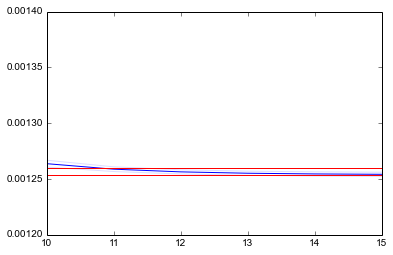

In [10]:
'''
Default Double LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']
#scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00126
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(10, 15)
ylim(0.0012,0.0014)

# looks like epoch 11 is good for 0.00001
# but might as well just make it 12 to be consistent with the others

(10, 21)
last 7.97343786871e-08 threshold 1e-05


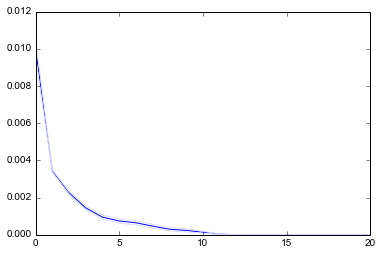

In [14]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']
#scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

#xlim(10, 15)
#ylim(0.00,0.00002)

# looks like epoch 12 is good for 0.00001

(10, 21)
last 8.66475158124e-05 threshold 9e-05


(0.0, 0.0001)

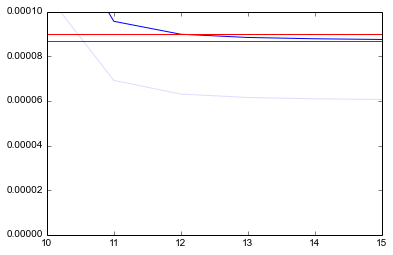

In [25]:
'''
Double GRU
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelgru_small-dropout10-shuffle0-data-test2-n100000-l7-random.pickle/stats-runA.npz')

vloss = data11['vloss']
#scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00009
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(10, 15)
ylim(0.00,0.0001)

# looks like epoch 12 is good for 0.00001

vloss shape (50, 13)
scores shape (50,)
[ 1.          0.125       0.          0.30208333  0.          0.          0.
  0.          0.          0.13541667  0.          0.          0.0625      0.
  0.          0.94791667  0.          0.          0.          0.          0.
  1.          1.          1.          0.          0.          0.41666667
  0.          0.86458333  0.61458333  1.          0.          0.          0.
  0.          0.33333333  0.          0.01041667  0.26041667  0.          1.
  0.          0.96875     0.46875     0.          0.          0.375       0.
  0.          0.        ]


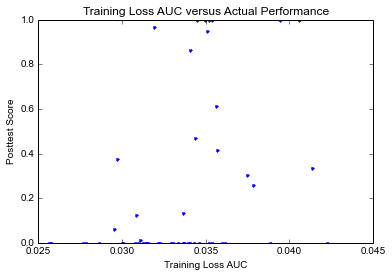

In [7]:
'''
Analyzing results of student2 with 4 skills, with training length 7 and testing length 6.
Default Double LSTM
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l7-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l7-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

xs = np.sum(vloss,axis=1)
ys = scores
title('Training Loss AUC versus Actual Performance')
xlabel('Training Loss AUC')
ylabel('Posttest Score')
plot(xs,ys,'.')

vloss shape (50, 13)
scores shape (50,)
[ 0.97916667  0.          0.          0.          0.          0.          0.
  0.          0.04166667  0.          0.          0.          0.
  0.54166667  0.58333333  0.          0.          0.53125     0.51041667
  0.96875     0.          0.          0.          0.          0.          0.
  0.          1.          0.1875      0.          0.          0.          1.
  0.          0.          0.          0.          0.57291667  0.          0.
  0.          1.          0.          0.          0.          1.          0.
  0.          0.92708333  0.        ]


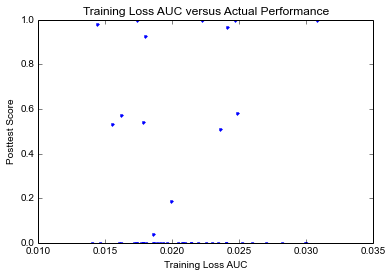

In [8]:
'''
Analyzing results of student2 with 4 skills, with training length 7 and testing length 6.
Single LSTM
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2-n100000-l7-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2-n100000-l7-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

xs = np.sum(vloss,axis=1)
ys = scores
title('Training Loss AUC versus Actual Performance')
xlabel('Training Loss AUC')
ylabel('Posttest Score')
plot(xs,ys,'.')

vloss shape (50, 13)
scores shape (50,)
[ 1.          0.98958333  0.01041667  0.          0.          0.          1.
  0.          0.          0.          0.98958333  0.          0.97916667
  0.          0.91666667  0.          0.01041667  0.          0.          0.
  0.          0.          0.97916667  0.          0.          0.          1.
  0.          0.54166667  0.          0.          0.10416667  0.          0.
  0.          0.          0.          1.          0.          0.
  0.19791667  0.          0.16666667  0.          0.          0.01041667
  0.          0.01041667  0.          0.        ]


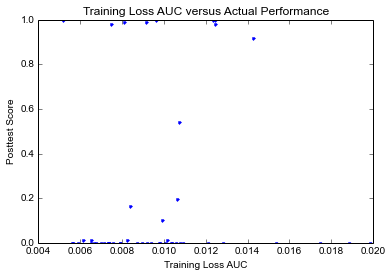

In [9]:
'''
Analyzing results of student2 with 4 skills, with training length 7 and testing length 6.
Double GRU
Looking at correlation between training AUC and actual performance
'''
data11 = np.load('experiments/test2_modelgru_small-dropout10-shuffle0-data-test2-n100000-l7-random.pickle/stats-runB.npz')
data21 = np.load('experiments/test2_modelgru_small-dropout10-shuffle0-data-test2-n100000-l7-random.pickle/mcts-rtype2-rollouts3000-trajectories100-real1-runB.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_('vloss shape {}'.format(vloss.shape))
#six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

xs = np.sum(vloss,axis=1)
ys = scores
title('Training Loss AUC versus Actual Performance')
xlabel('Training Loss AUC')
ylabel('Posttest Score')
plot(xs,ys,'.')

# Now switched to using egreedy 0.3 instead of random exploration

(10, 21)
last 0.00145415554735 threshold 0.00146


(0.0014, 0.0015)

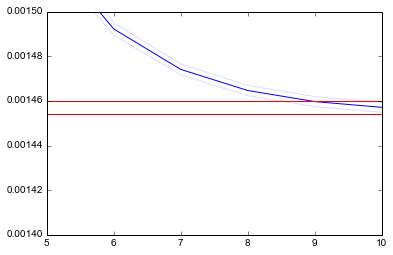

In [9]:
'''
Default Double LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_model_small-dropout10-shuffle0-data-test2-n100000-l7-egreedy0.30.pickle/stats-runA.npz')

vloss = data11['vloss']
#scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00146
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(5, 10)
ylim(0.0014,0.0015)

# looks like epoch 9 is good for 0.00001

(10, 21)
last 9.48756607707e-09 threshold 1e-05


(0.0, 2e-05)

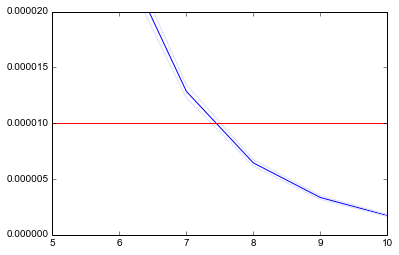

In [13]:
'''
Single LSTM
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelsimple_small-dropout10-shuffle0-data-test2-n100000-l7-egreedy0.30.pickle/stats-runA.npz')

vloss = data11['vloss']
#scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(5, 10)
ylim(0.00,0.00002)

# looks like epoch 8 is good for 0.00001

(10, 21)
last 1.97803311244e-07 threshold 1e-05


(0.0, 2e-05)

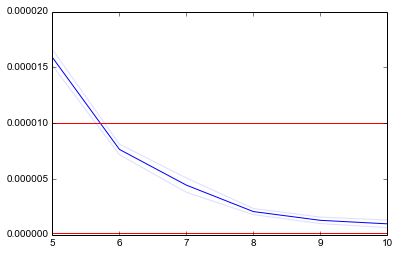

In [16]:
'''
Double GRU.
Trying to find a training epoch to stop training.
'''
data11 = np.load('experiments/test2_modelgru_small-dropout10-shuffle0-data-test2-n100000-l7-egreedy0.30.pickle/stats-runA.npz')

vloss = data11['vloss']
#scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.00001
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,20],[x_end,x_end],color='#ff0000')
plot([0,20],[x_thres,x_thres],color='#ff0000')

xlim(5, 10)
ylim(0.00,0.00002)

# looks like epoch 6 is good for 0.00001